# Homework 3

In [1]:
# Import Packages
from pyspark import SparkConf, SparkContext
from pyspark.ml.linalg import Vectors
import random
import time

### Load the Datasets

In [2]:
def readVectorsSeq(filename):
    file = open(filename, 'r')
    vector_list = []
    for row in file.readlines():
        vector_list.append(Vectors.dense([float(num_str) for num_str in row.split()]))
    return vector_list

In [3]:
vector_list = readVectorsSeq('test-datasets/prova.txt')

# Print Info of the Dataset
print 'INFO OF THE DATASET:'
print '- Number of points:', len(vector_list)
print '- Dimensionality of a Point:', len(vector_list[0])

INFO OF THE DATASET:
- Number of points: 11
- Dimensionality of a Point: 50


## Fake 2-D Dataset for Testing

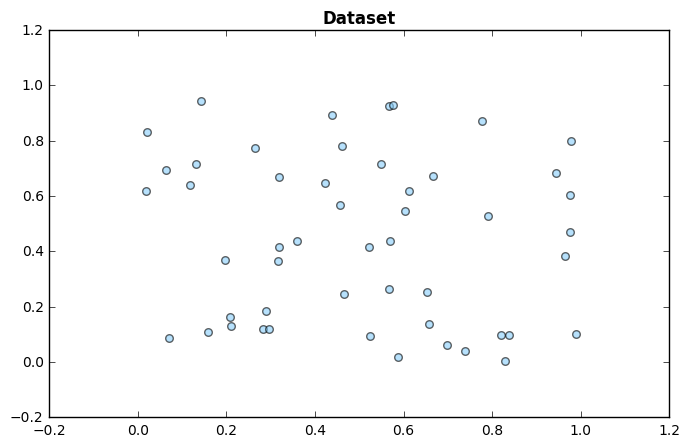

In [5]:
import numpy as np
import matplotlib.pyplot as plt

vector_list = []
np.random.seed(seed=0)
n_points = 50
for i in range(n_points):
    vector_list.append(Vectors.dense(np.random.rand(2)))

# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, alpha=0.6)
plt.show()

<hr>
### K-Centers

In [6]:
def kcenter(P, k):
    P_minus_S = [p for p in P]
    idx_rnd = random.randint(0, len(P)-1)
    S = [P[idx_rnd]]
    P_minus_S.pop(idx_rnd)
    related_center_idx = [idx_rnd for i in range(len(P))]
    dist_near_center = [Vectors.squared_distance(P[i], S[0]) for i in range(len(P))]

    for i in range(k-1):    
        new_center_idx = max(enumerate(dist_near_center), key=lambda x: x[1])[0] # argmax operation

        S.append(P[new_center_idx])
        P_minus_S.remove(P[new_center_idx])

        for j in range(len(P)):
            if j != new_center_idx:
                dist = Vectors.squared_distance(P[j], S[-1])
                if dist < dist_near_center[j]:
                    dist_near_center[j] = dist
                    related_center_idx[j] = new_center_idx
            else:
                dist_near_center[j] = 0
                related_center_idx[j] = new_center_idx
    return S

In [7]:
P = [p for p in vector_list]
centers = kcenter(P, 5)

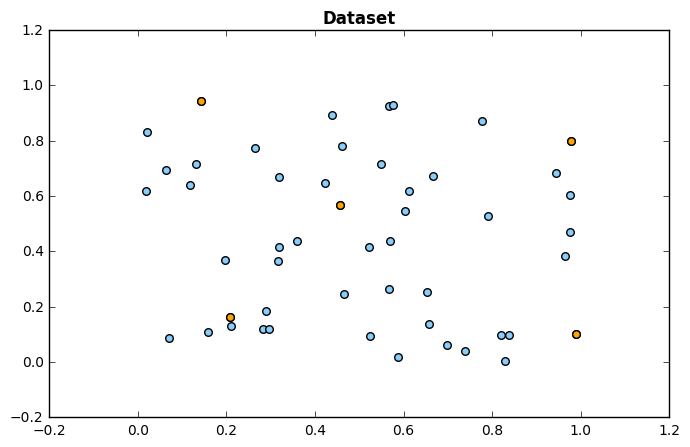

In [8]:
# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='orange', s=30, zorder=10)
    
plt.show()

<hr>
### Time Complexity of the K-Center Algorithm

In [9]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 50*(n+1)
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kcenter(P, 5)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [10]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)*n_datasets
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([(i+1)*50 for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.000119539191485 * |P| + 0.00676141524801 [s]


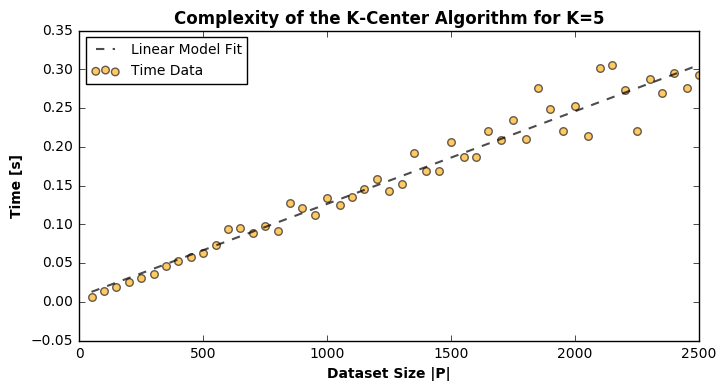

In [11]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* |P| +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Center Algorithm for K=5', fontweight='bold')
plt.scatter([(i+1)*50 for i in range(n_datasets)], times, alpha=0.6, c='orange', label='Time Data', s=30)
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Dataset Size |P|', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets*n_datasets)
plt.legend(loc=2, prop={'size':10})
plt.show()

#### Comments of the Plot Above
We see that we have a linear trend on time complexity varing the dataset size $|P|$, so we can say that with fixed number of centers ($K=5$ in this case) we have: 

$$\text{Time Complexity} \in O(|P|)$$

In [12]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 100
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kcenter(P, 2+n)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [13]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([2+i for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.00236198402396 * K + 0.00897928821797 [s]


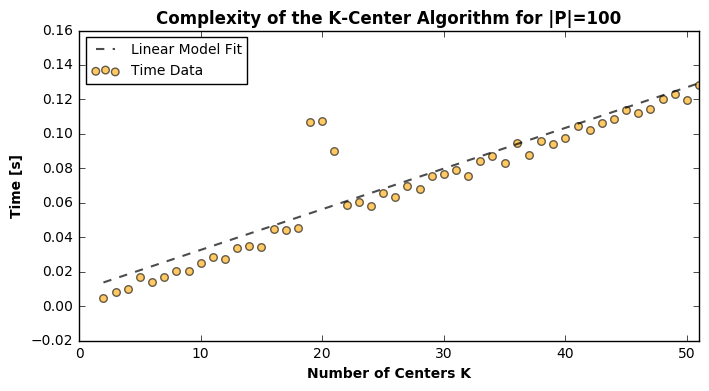

In [14]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* K +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Center Algorithm for |P|=100', fontweight='bold')
plt.scatter([2+i for i in range(n_datasets)], times, s=30, c='orange', alpha=0.6, label='Time Data')
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Number of Centers K', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets+1)
plt.legend(loc=2, prop={'size':10})
plt.show()

#### Comments of the Plot Above
We see that we have a linear trend on time complexity varing the number of centers $K$, so we can say that with fixed dataset size ($|P|=100$ in this case) we have: 

$$\text{Time Complexity} \in O(K)$$

<hr>
### K-Means++

In [15]:
def kmeansPP(P, k):
    P_minus_S = [p for p in P]
    idx_rnd = random.randint(0, len(P)-1)
    S = [P[idx_rnd]]
    P_minus_S.pop(idx_rnd)
    related_center_idx = [idx_rnd for i in range(len(P))]
    dist_near_center = [Vectors.squared_distance(P[i], S[0]) for i in range(len(P))]

    for i in range(k-1):    
        sum_dist = sum([d for d in dist_near_center])
        probs = [d / sum_dist for d in dist_near_center]
        cum_probs = [sum(probs[:i+1]) for i in range(len(P))]
        coin = random.random()
        cum_probs_minus_coin = [abs(cum_probs[j]-coin) for j in range(len(P))]
        new_center_idx = min(enumerate(cum_probs_minus_coin), key=lambda x: x[1])[0] # argmin operation
        
        # Append the New Center
        S.append(P[new_center_idx])
        P_minus_S.remove(P[new_center_idx])
        
        # Update the Distances and the Clusters
        for j in range(len(P)):
            if j != new_center_idx:
                dist = Vectors.squared_distance(P[j], S[-1])
                if dist < dist_near_center[j]:
                    dist_near_center[j] = dist
                    related_center_idx[j] = new_center_idx
            else:
                dist_near_center[j] = 0
                related_center_idx[j] = new_center_idx
                
    return S

In [16]:
P = [p for p in vector_list]
centers = kmeansPP(P, 5)

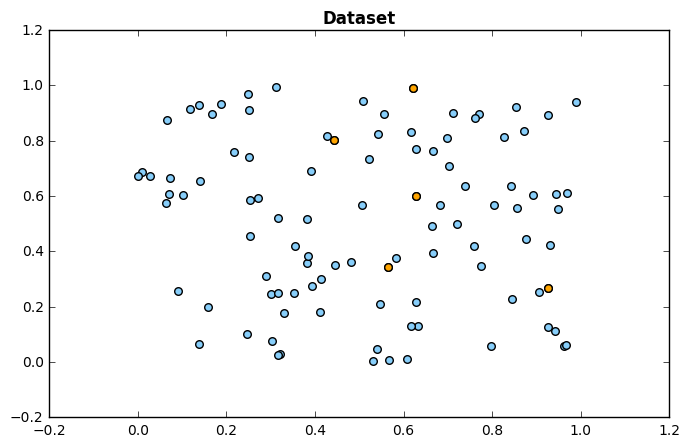

In [17]:
# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='orange', s=30, zorder=10)
    
plt.show()

<hr>
### Time Complexity of the K-Means++ Algorithm

In [18]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 50*(n+1)
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kmeansPP(P, 5)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [19]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)*n_datasets
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([(i+1)*50 for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.000796358702478 * |P| + -0.289534591753 [s]


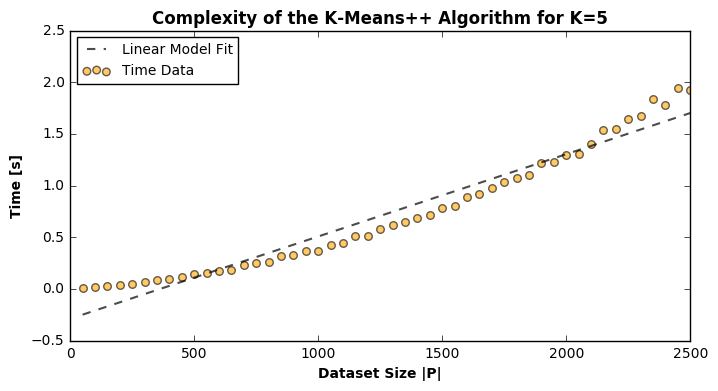

In [20]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* |P| +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Means++ Algorithm for K=5', fontweight='bold')
plt.scatter([(i+1)*50 for i in range(n_datasets)], times, alpha=0.6, c='orange', label='Time Data', s=30)
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Dataset Size |P|', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets*n_datasets)
plt.legend(loc=2, prop={'size':10})
plt.show()

In [24]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 100
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kmeansPP(P, 2+n)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [25]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([2+i for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.00328839787487 * K + 0.00958826084526 [s]


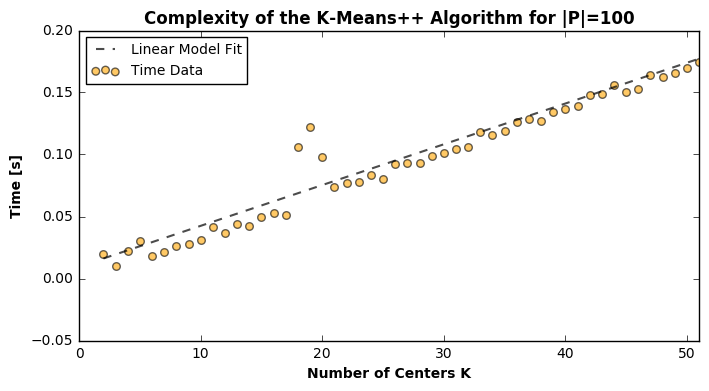

In [26]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* K +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Means++ Algorithm for |P|=100', fontweight='bold')
plt.scatter([2+i for i in range(n_datasets)], times, s=30, c='orange', alpha=0.6, label='Time Data')
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Number of Centers K', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets+1)
plt.legend(loc=2, prop={'size':10})
plt.show()

#### Comments of the Plot Above
We see that we have a linear trend on time complexity varing the number of centers $K$, so we can say that with fixed dataset size ($|P|=100$ in this case) we have: 

$$\text{Time Complexity} \in O(K)$$

<hr>
### K-Means Objective Function

In [ ]:
def kmeansObj(P, C):
    obj = 0
    related_center_idx = []
    
    for p in P:
        
        # Find the closest Center
        dist_min = Vectors.squared_distance(p, C[0])
        for c in C:
            dist = Vectors.squared_distance(p, c)
            
            if dist < dist_min:
                dist_min = dist
                
        # Update the Objective Function   
        obj += dist_min / len(P)
                
    return obj